In [1]:
# !pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
# smf = statsmodels.formula 약자임
import statsmodels.api as sm

In [3]:
# 데이터 읽기
beer = pd.read_csv("D:/workspace/20201107/dataset-20201107T042837Z-001/dataset/7_1_beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


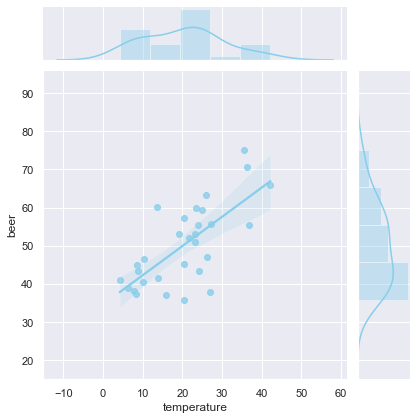

In [4]:
sns.jointplot(x='temperature', y='beer', kind='reg',
             data = beer, color = 'skyblue')

In [5]:
# 모델 구축 : 종속변수 맥주 매상, 독립변수: 기온을 사용한 정규선형모델
# 모집단분포가 정규분포임을 가정 시 최대 우도법의 결과는 최소 제곱법의 결과와 일치
# 범용 최소 제곱법
lm_model = smf.ols(formula = "beer ~ temperature",
                  data = beer).fit()

In [6]:
lm_model.summary()
# Dep.- 종속변수
# method 최소 제곱
# Data 날짜
# no.obsercvation - 관측 갯수
# DF Residuals: w절편
# DF model - 독립변수의 수
# Coveriance - 공분산 타입
# R-squared
# Ajd.R-squared - 수정된 R-sq
# F-statistic : 분산 분석시 사용하는 그 F 값 (클수록 좋다, 왜냐 그 모델이 F값에 비해 효과가 크다는것)
# LOG-Likelihood
# AIC : 변수 선택할때 AIC를 기준으로 선택함, AIC는 작을 수록 좋음, 절대적인 값은 없지만 상대적인 비교의 의미를 가짐(아카이케 정보) 변수를 추가하거나 뻈을때 이를 평가해주는 지수임
# BIC는 잘 안쓰고 AIC를 많이씀


# intercept : 절편 
# coef - co efficient
# std err = 표준오차
# t= t값
# P>ltl = 계수가 0이라는 것을 귀무가설로 했을때 
# 귀무가설을 계수가 0이라고 설정할때, 그랬을때의 P값을 뜻함. 지금의 경우 이 P값이 0이다 (지금은 0.05보다 작음 그러므로 대리가설을 채택함)
# 0.025~0.975 신뢰구간의 하,상한을 의미함

# skew - 외도 , kurtosis - 첨도


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.11e-05
Time:                        13:34:34   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# 회귀 모델링에서 했었던 MPG 를 가지고 위의 방식처럼 평가를 해보세요?
# 귀무가설을..weight독립면수-의 계수가 0이다. 라고 가설 할때,
# 0이란건 x가 y에 미치는 영향이 없다.->를 귀무가설로 놓고 검증
# 그 경우 확률을 구하는 것임.
# 유의 확률이 유의 수준인 0.05보다 작음 -> 귀무가설을 기각함.
# 유의 하다! 가 됨. weight가 영향을 준다.
# 그걸 검정을 하는방법에 

# 귀무는 현재의 상황이나, 일반적으로 이해하고 있는 상황을 가설을 함
# 새로운 것을 대립가설로 둔다.
# 주장 - 중량이 연비에 영향을 준다! - 가 대립가설
# 계수가 0 으로 세팅이 되어있음

# 연비에 영향을 안준다로 시작함
# 준다는 것을 주장하고 싶음
# 이 상황을 대립가설로 두는것

# 귀무가설 쉽게
# 다이어트 약이 있음, 약을 먹으면 10g이 빠짐 -> 일반적인 인식!
# 새 약이 나옴, 이걸 먹으면 10g보다 많이 빠짐을 주장!.

# 맞는지 모름, 이를 검정할때....
# 귀무가설 - 10g이 빠짐 , 새롭게 주장하는게 대립


# P값이 귀무가설의 계수가 0이라고 세팅이 되어있는 상태***
# 

In [8]:

# 데이터 읽기
mpg_data = pd.read_excel('D:/workspace/20201107/dataset-20201107T042837Z-001/dataset/auto-mpg.xlsx')
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
# 위에서 mpg와 weight를 가지고 놀아보겠음

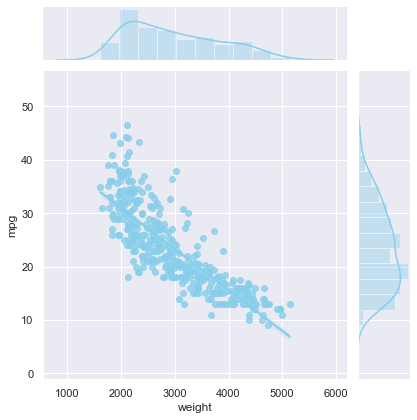

In [10]:
sns.jointplot(x='weight', y='mpg', kind='reg',
             data = mpg_data, color = 'skyblue')
# weight의 변화에 따라서 mpg가 변하는 것을 보려고함
# 문제에 따라서 xy는 다를 수 있음.
# 차량 중량과 연비간의 관계

In [11]:
lm_model = smf.ols(formula = "mpg ~ weight",
                  data = mpg_data).fit()
# 종속 ~ 독립
# 중량이 연비에 어떻게 영향을 미치는가
# 회귀식이라는건 중량이 주어지면 연비를 예측할 수 있는 모델이 됨.

In [12]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Sat, 21 Nov 2020   Prob (F-statistic):          2.97e-103
Time:                        13:34:39   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## NULL 모델 AIC
#### AIC는 낮을 수록 좋음

In [17]:
null_model = smf.ols('beer ~ 1', data=beer).fit()
# 1 -> 독립변수가 없어서 1이라고 함, 절편만 있는거임
null_model.aic

227.94194972563105

In [46]:
# 독립 변수가 있는 모델의 AIC
# 독립변수가 있는 모델의 AIC가 더 작으므로 예측 정확도가 높은것을 알 수 있다.
# lm_model = 변수이름, ~ = 모델식
lm_model = smf.ols(formula = 'beer ~ temperature', data = beer).fit()
lm_model.aic

208.9090293557544

In [20]:
# 사용된 독립변수의 수
# 1개 쓴것으로 나온다
lm_model.df_model

1.0

In [21]:
# 추정된 모델에 predict() 함수 적용
# 예측한 값이 나옴
lm_model.predict()

array([50.3014808 , 53.74590495, 42.26449113, 55.20021737, 46.70397114,
       37.82501112, 44.94348769, 54.51133254, 52.44467805, 41.11634975,
       54.66441806, 49.22988218, 53.21010564, 52.44467805, 41.03980699,
       52.59776357, 45.24965873, 61.78289462, 55.42984564, 50.3014808 ,
       42.41757665, 50.3014808 , 51.14345115, 40.6570932 , 66.91125946,
       52.9039346 , 62.85449324, 41.42252079, 62.47177945, 39.50895182])

In [23]:
lm_model.params
# 절편 ,  temerature

Intercept      34.610215
temperature     0.765428
dtype: float64

In [24]:
# 기온이 20도일 때의 맥주 매상의 기대(예측)값
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.918767
dtype: float64

In [25]:
# 잔차 계산
resid = lm_model.resid
resid.head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [26]:
# beta0 + beta1 * 20
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
beta0 + beta1 * temperature

49.91876701095053

In [27]:
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [28]:
# predict 함수랑 비교해보자
lm_model.predict()[:3]

array([50.3014808 , 53.74590495, 42.26449113])

In [29]:
# 잔차(실제값 - 예측값)
(beer.beer - y_hat).head()

0    -5.001481
1     5.554095
2    -1.864491
3   -17.200217
4    -9.703971
dtype: float64

In [30]:
# 결정계수
# R-squared는 가지고 있는 데이터에 대해 모델을 적용 했을 때의 적합도를 평가하는 지표
# 모델에 의한 추측치가 종속변수의 실제 값과 일치하면 1이 됨

# 이걸 수식으로 해보게써

mu = np.mean(beer.beer)
y = beer.beer
# 예측값
yhat = lm_model.predict()

np.sum((yhat-mu)**2 / np.sum((y-mu)**2))

0.5039593230611877

In [31]:
# R-squared
lm_model.rsquared

0.5039593230611856

In [33]:
# 전체 변동폭의 크기에 대한 모델로 설명 가능한 변동폭의 비율
1-np.sum(resid**2) / np.sum((y-mu)**2)

# 전체 변동폭이라는건 모델로 설명할 수 있는 부분과 아닌게 있는데, 설명 할 수 있는건 잔차임
# 뒤에 식은 모델로 설명이 가능한 부분인 잔차를 의미한다(?)

# 밑에 나온 결과는 "우리가 만든 모델로 설명이 가능한 부분"을 의미함.

0.5039593230611856

In [35]:
# 수정된 결정계수 :  독립 변수가 늘어가는 것에 대해 패널티를 적용한 결정계수
# 독립변수가 늘어나면 결정계수가 늘어남, 그래서 좀 조정이 필요함(패널티 적용)
# s : 독립변수의 계수

n= len(beer.beer)
# beer 변수의 길리

s = 1
1-((np.sum(resid**2) / (n-s-1)) / (np.sum((y-mu)**2) /(n-1)))

0.48624358459908523

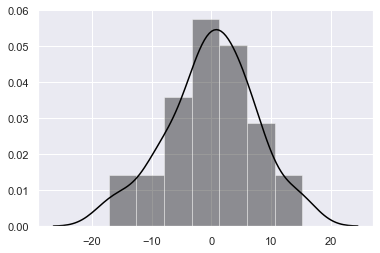

In [40]:
# 잔차 그래프
import warnings
warnings.filterwarnings('ignore')
sns.distplot(resid, color = 'black')

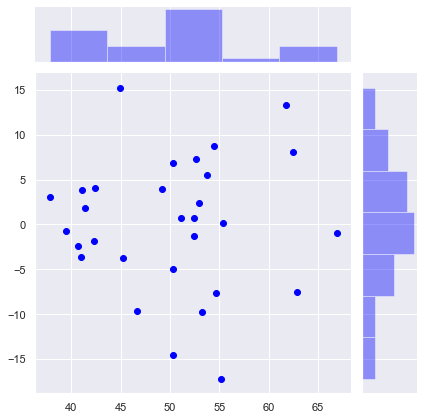

In [42]:
# 잔차의 산점도
# x축이 적합도, y축이 잔차
# kws = 키워드즈 = 옵션을 주는것
sns.jointplot(lm_model.fittedvalues, resid, joint_kws={'color':'blue'},
             marginal_kws = {'color':'blue'})

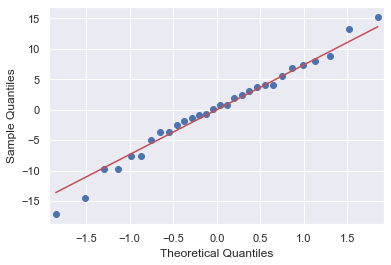

In [44]:
# Q-Q플롯 : 이론상의 분위점과 실제 데이터의 분위점을 산포도 그래프로 그린 것
# 이론상의 분위점과 실제 데이터의 분위점을 구해서 그 둘을 비교하는 것으로 잔차가
# 정규분포인지를 시각적으로 판단
fig = sm.qqplot(resid, line='s')

In [45]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.11e-05
Time:                        14:27:25   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prob가 0.5 보다 크므로 귀무가설을 기각할수 없으므로 채택해야함

In [47]:
# Prop(Omnibus), Prob(JB)는 잔차의 정규성에 대한 검정결과
# 귀무가설 : 잔차가 정규분포를 따른다.
# 대립가설 : 잔차가 정규분포라고 주장할 수 없다.
# P 값이 0.05 보다 크다고 해도 검정의 비대칭성이 있으면 정규분포라고 주장 할 수 없다.

# (왜도 (skew)가 있으면 한쪽으로 기울었다 -> 비대칭성이 있다)
# 왜도가 0보다 크면 오른쪽 자락이 길어짐. 정규 분포 왜도는 0
# 첨도 : 히스토그램의 뾰족함을 측정하는 지표, 정규 분포 첨도는 3
# Durbin-Watson : 잔차의 자기 상관을 체크하는 지표, 2 전후라면 문제 없다고 판단.
# Durbin-Watson(DW) 통계량이 2보다 크거나 차이가 난다면 일반화 제곱법등의 사용 검토 필요


# 분산 분석 (내용은 업로드 해주신다고 함)

In [48]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set()

## 검정의 다중성
- 검정을 반복함으로써 유의미한 결과를 얻기 쉬워지는 문제를 검정의 다중성이라 함
- 검정을 반복하면 귀무가설이 기각되기 쉬워지고 1종 오류를 저지를 확률이 높아집니다
- 맑음, 비, 흐림의 세가지 수준으로 대상이 달라지는지 점정 할 때 맑음 대비 비, 비 대비 흐림, 맑음 대비 흐림의 3가지 조합으로 t 검정을 실시하면 검정의 다중성 문제가 발생
- 반면, 분산분석을 수행하면 맑음이나 비와같은 개별 카테고리를 보는것이 아니라 날씨에 따라 매상이 다른지 여부를 한번의 검정으로 판단

## 분산 분석의 직감적 사고방식 : F비
- 귀무가설 : 수준간의 평균값에 차이가 없다.
- 대립가설 : 수준간의 평균값에 차이가 있다.

- 수준 : 날씨, 물고기 종류 등과 같은 카테고리 변수를 의미
- 분산 분석에서는 데이터의 변동을 오차와 효과로 분리하여 F비 계산 [F비 = 효과의 분산 크기 / 오차의 분산 크기]
- 효과의 크기를 군간 변동, 오차의 크기를 군내 변동이라 하고 데이터의 분산을 2개의 변동으로 나눈 뒤 그 비율을 취한 것을 통계량으로 사용하여 검정 시행
- 분산의 비율을 취한 통계량으로 검정을 시행하므로 분산분석 (ANOVA) 라고 부름
- F 비가 크면 오차에 비해 효과의 영향이 클 것 이라고 판단
- F분포의 누적 분포함수를 사용해서 p 값을 계산하고 p 값이 0.05 이하가 되면 귀무가설을 기각

In [57]:
# 샘플 데이터
weather = [
    'cloudy','cloudy',
    'rainy','rainy',
    'sunny','sunny'
]
beer = [6,8,2,4,10,12]
weather_beer = pd.DataFrame({
    "beer":beer,
    "weather":weather
})
weather_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


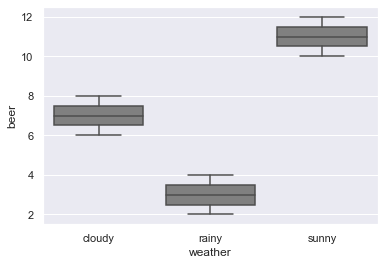

In [58]:
# box plot
sns.boxplot(x='weather', y='beer', data=weather_beer, color='gray')

In [59]:
# 날씨별 매상의 평균치
weather_beer.groupby('weather').mean()

,beer
weather,
cloudy,7
rainy,3
sunny,11


In [60]:
# 날씨에 의한 영향 : 2일씩 6일에 대한 날씨별 매상의 평균치
effect = [7,7,3,3,11,11]

In [62]:
# effect의 흩어진 정도를 구함으로써 군간변동을 구할 수 있음
# 군간 제곱합 : 군간 변동의 분자
mu_effect = np.mean(effect)
squares_model = np.sum((effect - mu_effect)**2)
squares_model

64.0

In [63]:
# 오차는 원래 데이터에서 효과를 빼는 것으로 계산
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [64]:
# 군내 제곱합 : 오차와 평균값은 0
squares_resid = np.sum(resid**2)
squares_resid

6

In [67]:
df_model = 2 # 군간 변동의 자유도 ( 수준의 종류 수에 따라 좌우, 수준(3) - 1 )
df_resid = 3 # 군내 변동의 자유도 ( 샘플사이즈와 수준의 종류에 따라 좌우) 
# 샘플(6) - 수준(3) = 3

In [69]:
# 군간 평균제곱(분산)
variance_model = squares_model / df_model
variance_model

32.0

In [70]:
# 군내 평균제곱(분산)
variance_resid = squares_resid/df_resid
variance_resid

2.0

In [71]:
# F 비 :  군간 분산과 군내 분산의 비
f_ratio = variance_model / variance_resid
f_ratio

16.0

In [74]:
# p값
1-sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.02509457330439091

#### p값이 0.05보다 작으므로 귀무가설은 기각된다

In [75]:
# 일반화선형모델 (비모수적 방법) 과 일반선형모델(모수적 방법)은 다름!!!!!

# 독립변수가 카테고리형인 일반선형모델
# 독립 변수가 연속적 변수든 카테고리형 변수든 smf, ols를 사용해서 모델링 가능
# statsmodels를 이용한 분산분석( 독립 변수가 카테고리 형 )

anova_model = smf.ols('beer ~ weather', data = weather_beer).fit()

In [76]:
# 분산분석표
# 군간, 군내 , 편차제곱합, 자유도, F비, p값
sm.stats.anova_lm(anova_model, typ = 2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


In [77]:
# 추정된 모델의 개수
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

- rainy 일때는 -4 인걸로 봐선, 판매가 저조하겠군
- sunny 일때는 +4 인걸로 봐선, 판매가 괜찮겠군

- intercept에 cloudy 등이 들어간듯(?)

In [79]:
# 훈련 데이터에 적용한 결과
# 독립변수를 카테고리형 변수로 한 일반선형모델의 추측치는 각 수준의 평균값과 일치
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [80]:
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [82]:
beer = pd.read_csv("D:/workspace/20201107/dataset-20201107T042837Z-001/dataset/7_1_beer.csv")
lm_model = smf.ols(formula = 'beer ~ temperature', data = beer).fit()
# 모델 추정했음

In [83]:
# 자유도
df_lm_model = 1 # 추정된 파라미터 (2) - 1
df_lm_resid = 28 # 샘플사이즈(30) - 추정된 파라미터 수(2)

- 위에 맥주랑 날씨 한것처럼 날씨랑 온도도 해볼것

In [92]:
# 분산 분석표
sm.stats.anova_lm(lm_model,typ=2)

# anova 가 type1(type) 과 type 2가 있는데 여기서는 type 2 (typ)를 사용한다.
# type1 은 mean_sq가 추가되어 나온다

,sum_sq,df,F,PR(>F)
temperature,1651.532489,1.0,28.446984,0.000011
Residual,1625.582178,28.0,NaN,NaN


In [94]:
# 독립변수가 여럿인 모델 : 복수의 독립변수를 가지고 있어도 일반선형모델구조를 이용해서 분석, 해석, 예측이 가능함
sales = pd.read_csv("D:/workspace/20201107/dataset-20201107T042837Z-001/dataset/7_3_lmm.csv")
sales.head(3)

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy


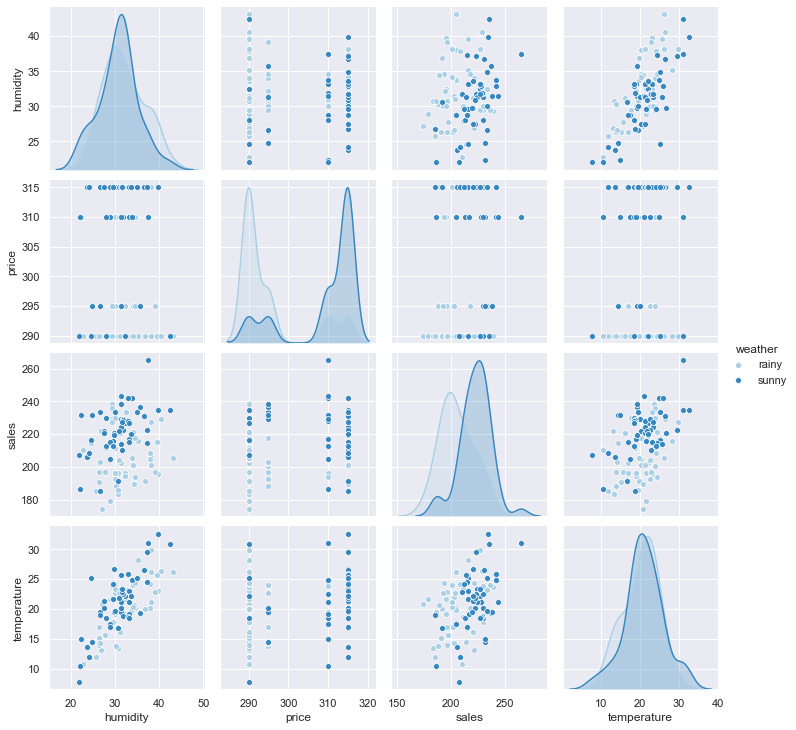

In [95]:
# pairplot()
sns.pairplot(data = sales, hue = 'weather', palette = 'Blues')

- 위 그림만으로는 insight를 찾기가 좀 힘든듯..

In [98]:
# 독립변수에 가격만 사용
lm_dame = smf.ols("sales ~ price", sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

- price가 0.33 (양수) 인걸보니 가격이 오르면 매상이 오른다.
- 그런데 우리가 생각한거랑 좀 다름, 보통 가격이 내려야 매상이 올라야함(?)
- 왜그런지 알아봅시다.

In [99]:
sm.stats.anova_lm(lm_dame, typ=2)

,sum_sq,df,F,PR(>F)
price,1398.392322,1.0,4.970685,0.028064
Residual,27570.133578,98.0,NaN,NaN


- 가격에 대한 p 값을 보자. (0.028)이다.
- 0.05보다 작다!.
- 고로 가격은 매상에게 유의미하다. 그런데 가격이 올라가면 매상이 증가한다 ? -> 문제가 있음!.

- 날씨가 흐리고, 맑고 다 무시하고 가격만가지고 진행해서 문제가 생긴것임,

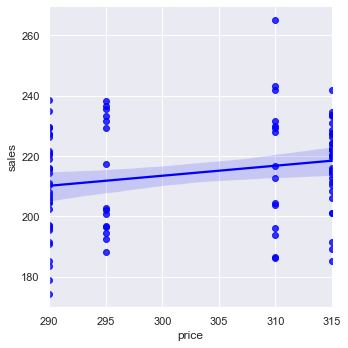

In [101]:
# 매상을 가격으로만 분석하여 문제 소지 발생
# 진짜 그런지 그림을 그려봅시다
sns.lmplot(x='price', y='sales', data = sales,
          scatter_kws = {'color' : 'blue'},
          line_kws = {'color':'blue'})

- 그림만봐도 가격이 오르는데 판매가 오름

In [102]:
# 독립변수간의 관계를 조사해본다

# 날씨별 평균값을 구한다

sales.groupby('weather').mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


- rainy랑 sunny간에 (온도 등)차이가 있음에도 위 분석에는 포함되지 않음
- 그렇다면 날씨가 같았을 때 상품 가격이 매상에 미치는 영향은?

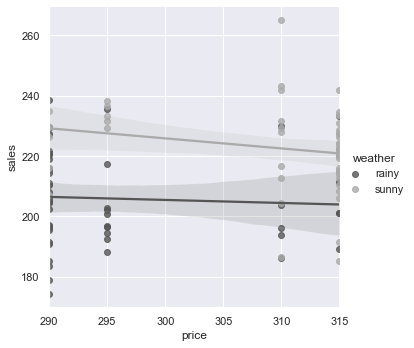

In [105]:
# 날씨가 같았을 때 상품 가격이 매상에 미치는 영향은?
# 날씨별로 보면 가격이 높아지면 매상이 줄어든다는 것을 알 수 있음. 알바봅시다
sns.lmplot(x='price', y='sales', data=sales,
          hue = 'weather', palette='gray')

- 확실히 변수를 제대로 반영하지 않았던 것이 문제가 되었다.

In [110]:
# 독립 변수가 4개인 모델 추정
lm_sales = smf.ols(
"sales ~ weather + humidity + temperature + price", data=sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

- 매출에는 sunny가 가장 많이 영향을 주는듯
- 습도는 -(음수)이다

In [111]:
# 이 모델은 유의미 한가?
# 분산 분석으로 검정을 해본다!.

sm.stats.anova_lm(lm_sales, typ=1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
humidity,1.0,1779.601,1779.601,9.805,0.002
temperature,1.0,2076.845,2076.845,11.443,0.001
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


- p 값이 0.05보다 낮기에 유의미 하다~ 라고 볼 수 있다(?)

### 독립변수 순서를 바꿔서 다시 해본다

In [112]:
lm_sales_2 = smf.ols(
"sales ~ weather + temperature + humidity + price", data=sales).fit()
sm.stats.anova_lm(lm_sales_2, typ=1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
temperature,1.0,3814.779,3814.779,21.018,0.000
humidity,1.0,41.667,41.667,0.230,0.633
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


- humidity가 다르게 나온다(?)
- 순서를 바꾸면 유의성 결과가 다르다.
- typ = 1으로 하면 이렇게됨, 변수가 많을 때는 typ=2로 해주세요!

In [114]:
# t 검정을 해본다
# t 검정을 수행하면 같은 문제는 발생되지 않음
# 검정 다중성의 문제가 발생 (앞에 설명있따 읽어봐라-)
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


- humidity는 유의미 하지 않음

In [117]:
lm_sales_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


- 똑같이 잘 나오는데, 검정의 다중성 문제가 있음.

### type1과 type2 의 차이가 뭔지 보여주것음

In [118]:
# 분산 분석을 해주는 로직의 차이임
# 유의 수준을 0.05(5%)로 보는데, 검증을 반복할수록 오류를 범할 확률이 높아짐.
# 